# Chicago Community Analysis


# Loading Chicago Crime Data

In [ ]:
import requests
import pandas as pd

path = "/content/Crimes_-_2001_to_Present_20250127 (1).csv"
crime_data = pd.read_csv(path)

crime_data.shape


(1877755, 22)

In [ ]:
crime_data.head()

ID Case Number                    Date                 Block  IUCR  \
0  8953937    HW102973  12/31/2012 11:58:00 PM      037XX N NORA AVE  0610   
1  8950836    HW100039  12/31/2012 11:55:00 PM       0000X E OHIO ST  2890   
2  8954299    HW100700  12/31/2012 11:55:00 PM  058XX S MARYLAND AVE  0890   
3  8950918    HW100021  12/31/2012 11:55:00 PM  035XX W MONTROSE AVE  0610   
4  8951459    HW100757  12/31/2012 11:50:00 PM    028XX N HALSTED ST  0890   

             Primary Type      Description       Location Description  Arrest  \
0                BURGLARY   FORCIBLE ENTRY           RESIDENCE-GARAGE   False   
1  PUBLIC PEACE VIOLATION  OTHER VIOLATION                   SIDEWALK    True   
2                   THEFT    FROM BUILDING  HOSPITAL BUILDING/GROUNDS   False   
3                BURGLARY   FORCIBLE ENTRY                      OTHER   False   
4                   THEFT    FROM BUILDING                  RESIDENCE   False   

   Domestic  ...  Ward  Community Area  FBI Code  X Coordinate Y Coordinate  \
0     False  ...  36.0            17.0        05     1128745.0    1924002.0   
1     False  ...  42.0             8.0        26     1176775.0    1904213.0   
2     False  ...   5.0            41.0        06     1182887.0    1866434.0   
3     False  ...  33.0            16.0        05     1152066.0    1929015.0   
4     False  ...  44.0             6.0        06     1170439.0    1919244.0   

   Year              Updated On   Latitude  Longitude  \
0  2012  02/10/2018 03:50:01 PM  41.947762 -87.802171   
1  2012  02/10/2018 03:50:01 PM  41.892508 -87.626224   
2  2012  02/10/2018 03:50:01 PM  41.788699 -87.604954   
3  2012  02/10/2018 03:50:01 PM  41.961089 -87.716315   
4  2012  02/10/2018 03:50:01 PM  41.933894 -87.649053   

                        Location  
0  (41.947761848, -87.802170774)  
1  (41.892507592, -87.626223996)  
2  (41.788699253, -87.604954085)  
3  (41.961089289, -87.716314748)  
4  (41.933894393, -87.649052922)  

[5 rows x 22 columns]

# Data Check

In [ ]:
crime_summary = crime_data_filtered.groupby(['Community Area']).size().reset_index(name='crime_count')

print(crime_summary.head())


   Community Area  crime_count
0             0.0           25
1             1.0        28080
2             2.0        24046
3             3.0        26012
4             4.0        12631


In [ ]:
census_data = pd.read_csv('/content/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012_20250127.csv')
census_data.columns

Index(['Community Area Number', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

In [ ]:
census_data.head()

Community Area Number COMMUNITY AREA NAME  PERCENT OF HOUSING CROWDED  \
0                    1.0         Rogers Park                         7.7   
1                    2.0          West Ridge                         7.8   
2                    3.0              Uptown                         3.8   
3                    4.0      Lincoln Square                         3.4   
4                    5.0        North Center                         0.3   

   PERCENT HOUSEHOLDS BELOW POVERTY  PERCENT AGED 16+ UNEMPLOYED  \
0                              23.6                          8.7   
1                              17.2                          8.8   
2                              24.0                          8.9   
3                              10.9                          8.2   
4                               7.5                          5.2   

   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  \
0                                          18.2   
1                                          20.8   
2                                          11.8   
3                                          13.4   
4                                           4.5   

   PERCENT AGED UNDER 18 OR OVER 64  PER CAPITA INCOME   HARDSHIP INDEX  
0                              27.5               23939            39.0  
1                              38.5               23040            46.0  
2                              22.2               35787            20.0  
3                              25.5               37524            17.0  
4                              26.2               57123             6.0

In [ ]:
print(df.tail())


          id case_number                     date                 block  iucr  \
995  8949694    HV622061  2012-12-30T16:52:00.000    071XX S WABASH AVE  1320   
996  8962082    HW110563  2012-12-30T16:45:00.000        071XX S MAY ST  0890   
997  8949777    HV622092  2012-12-30T16:45:00.000    117XX S NORMAL AVE  041A   
998  8949661    HV622062  2012-12-30T16:33:00.000      034XX N CLARK ST  1320   
999  8949641    HV622055  2012-12-30T16:31:00.000  013XX S LAWNDALE AVE  1811   

        primary_type                   description     location_description  \
995  CRIMINAL DAMAGE                    TO VEHICLE                   STREET   
996            THEFT                 FROM BUILDING                RESIDENCE   
997          BATTERY           AGGRAVATED: HANDGUN  RESIDENCE PORCH/HALLWAY   
998  CRIMINAL DAMAGE                    TO VEHICLE                   STREET   
999        NARCOTICS  POSS: CANNABIS 30GMS OR LESS                   STREET   

     arrest  domestic  ... ward commun

# Mergin Data

In [ ]:
merged_data = census_data.merge(
    crime_summary,
    left_on="Community Area Number",
    right_on="Community Area",
    how="right"
)

print(merged_data.head())


   Community Area Number COMMUNITY AREA NAME  PERCENT OF HOUSING CROWDED  \
0                    NaN                 NaN                         NaN   
1                    1.0         Rogers Park                         7.7   
2                    2.0          West Ridge                         7.8   
3                    3.0              Uptown                         3.8   
4                    4.0      Lincoln Square                         3.4   

   PERCENT HOUSEHOLDS BELOW POVERTY  PERCENT AGED 16+ UNEMPLOYED  \
0                               NaN                          NaN   
1                              23.6                          8.7   
2                              17.2                          8.8   
3                              24.0                          8.9   
4                              10.9                          8.2   

   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  \
0                                           NaN   
1                               

In [ ]:
merged_data['credit_risk_index'] = (
    merged_data['crime_count'] * (merged_data['PERCENT AGED 16+ UNEMPLOYED'] / 100)
) / merged_data['PER CAPITA INCOME ']

print(merged_data[['Community Area', 'credit_risk_index']].head())


   Community Area  credit_risk_index
0             0.0                NaN
1             1.0           0.102049
2             2.0           0.091842
3             3.0           0.064690
4             4.0           0.027602


In [ ]:
merged_data.shape

(78, 12)

In [ ]:
merged_data.rename(columns={"Community Area": "community_area"}, inplace=True)


# Coomunity Visualization

In [ ]:
merged_data.columns

Index(['Community Area Number', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'date', 'year'],
      dtype='object')

In [ ]:
# Data Cleaning

missing_values = df[['latitude', 'longitude']].isna().sum()
print(missing_values)


latitude     13
longitude    13
dtype: int64


In [ ]:
df = df.dropna(subset=['latitude', 'longitude'])

In [ ]:
boundary_data = pd.read_csv('/content/CommAreas_20250126.csv')

In [ ]:
boundary_data.columns

Index(['the_geom', 'PERIMETER', 'AREA', 'COMAREA_', 'COMAREA_ID', 'AREA_NUMBE',
       'COMMUNITY', 'AREA_NUM_1', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry'],
      dtype='object')

In [ ]:
boundary_data.head()

the_geom  PERIMETER  AREA  \
0  MULTIPOLYGON (((-87.60914087617894 41.84469250...          0     0   
1  MULTIPOLYGON (((-87.59215283879394 41.81692934...          0     0   
2  MULTIPOLYGON (((-87.62879823733725 41.80189303...          0     0   
3  MULTIPOLYGON (((-87.6067081256125 41.816813770...          0     0   
4  MULTIPOLYGON (((-87.59215283879394 41.81692934...          0     0   

   COMAREA_  COMAREA_ID  AREA_NUMBE        COMMUNITY  AREA_NUM_1  \
0         0           0          35          DOUGLAS          35   
1         0           0          36          OAKLAND          36   
2         0           0          37      FULLER PARK          37   
3         0           0          38  GRAND BOULEVARD          38   
4         0           0          39          KENWOOD          39   

     SHAPE_AREA     SHAPE_LEN  \
0  4.600462e+07  31027.054510   
1  1.691396e+07  19565.506153   
2  1.991670e+07  25339.089750   
3  4.849250e+07  28196.837157   
4  2.907174e+07  23325.167906   

                                            geometry  
0  MULTIPOLYGON (((-87.60914087617894 41.84469250...  
1  MULTIPOLYGON (((-87.59215283879394 41.81692934...  
2  MULTIPOLYGON (((-87.62879823733725 41.80189303...  
3  MULTIPOLYGON (((-87.6067081256125 41.816813770...  
4  MULTIPOLYGON (((-87.59215283879394 41.81692934...

In [ ]:
import geopandas as gpd
from shapely.wkt import loads

boundary_data['geometry'] = boundary_data['the_geom'].apply(loads)
gdf = gpd.GeoDataFrame(boundary_data, geometry='geometry')
gdf.merge(merged_data, right_on = "Community Area", left_on = "AREA")
gdf.set_crs(epsg=4326, inplace=True)

gdf.head()


the_geom  PERIMETER  AREA  \
0  MULTIPOLYGON (((-87.60914087617894 41.84469250...          0     0   
1  MULTIPOLYGON (((-87.59215283879394 41.81692934...          0     0   
2  MULTIPOLYGON (((-87.62879823733725 41.80189303...          0     0   
3  MULTIPOLYGON (((-87.6067081256125 41.816813770...          0     0   
4  MULTIPOLYGON (((-87.59215283879394 41.81692934...          0     0   

   COMAREA_  COMAREA_ID  AREA_NUMBE        COMMUNITY  AREA_NUM_1  \
0         0           0          35          DOUGLAS          35   
1         0           0          36          OAKLAND          36   
2         0           0          37      FULLER PARK          37   
3         0           0          38  GRAND BOULEVARD          38   
4         0           0          39          KENWOOD          39   

     SHAPE_AREA     SHAPE_LEN  \
0  4.600462e+07  31027.054510   
1  1.691396e+07  19565.506153   
2  1.991670e+07  25339.089750   
3  4.849250e+07  28196.837157   
4  2.907174e+07  23325.167906   

                                            geometry  
0  MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...  
1  MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...  
2  MULTIPOLYGON (((-87.6288 41.80189, -87.62879 4...  
3  MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4...  
4  MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...

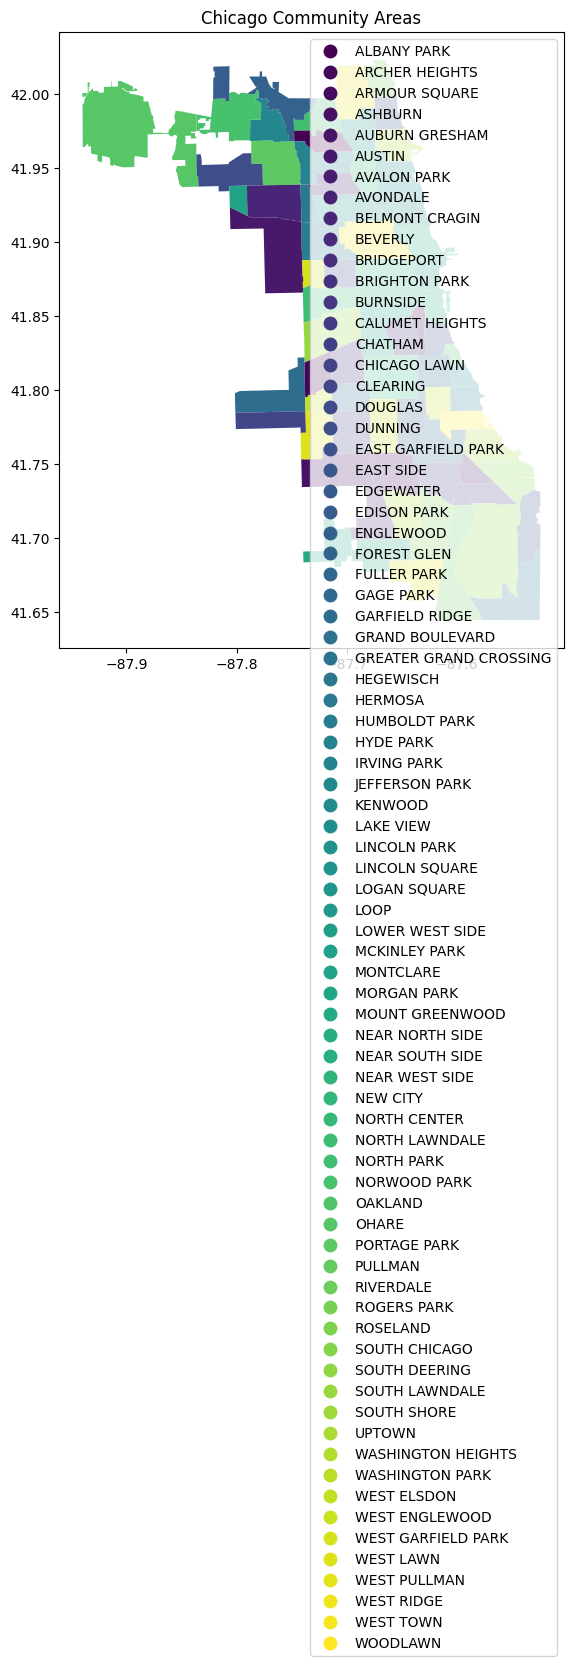

In [ ]:
import matplotlib.pyplot as plt

gdf.plot(column='COMMUNITY', cmap='viridis', legend=True, figsize=(12, 8))
plt.title("Chicago Community Areas")
plt.show()


In [ ]:

merged_gdf = gdf.merge(merged_data, left_on='AREA_NUMBE', right_on= "Community Area", how='left')

merged_gdf['credit_risk_index'] = merged_gdf['credit_risk_index'].fillna(0)


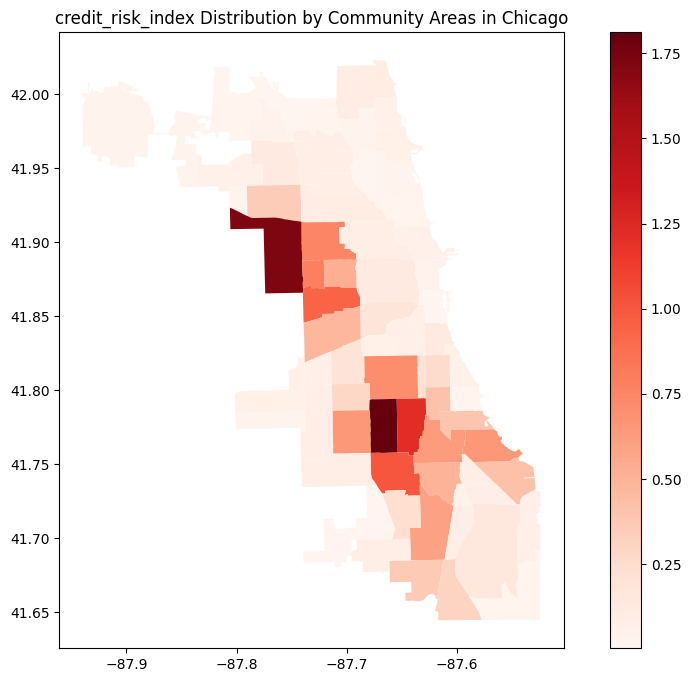

In [ ]:
merged_gdf.plot(column='credit_risk_index', cmap='Reds', legend=True, figsize=(12, 8))
plt.title("credit_risk_index Distribution by Community Areas in Chicago")
plt.show()


In [ ]:
import folium
from folium.features import GeoJsonTooltip

m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

folium.Choropleth(
    geo_data=merged_gdf,
    data=merged_gdf,
    columns=["COMMUNITY", "credit_risk_index"],
    key_on="feature.properties.COMMUNITY",
    fill_color="Reds",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Credit Risk Index"
).add_to(m)

folium.GeoJson(
    merged_gdf,
    tooltip=GeoJsonTooltip(
        fields=["COMMUNITY", "credit_risk_index"],
        aliases=["Community Name:", "Credit Risk Index:"],
        localize=True
    ),
    style_function=lambda x: {"fillOpacity": 0, "color": "black", "weight": 0.5}
).add_to(m)

m.save("interactive_credit_risk_map.html")
m


In [ ]:
print(merged_gdf[['crime_count', 'PERCENT AGED 16+ UNEMPLOYED', 'PER CAPITA INCOME ', 'credit_risk_index']].describe())


         crime_count  PERCENT AGED 16+ UNEMPLOYED  PER CAPITA INCOME   \
count      77.000000                    77.000000           77.000000   
mean    24375.051948                    15.372727        25563.168831   
std     20570.387424                     7.543412        15293.098259   
min      1859.000000                     4.700000         8201.000000   
25%      9741.000000                     9.200000        15754.000000   
50%     17957.000000                    13.900000        21323.000000   
75%     35701.000000                    20.000000        28887.000000   
max    121672.000000                    35.900000        88669.000000   

       credit_risk_index  
count          77.000000  
mean            0.253806  
std             0.365016  
min             0.002950  
25%             0.045982  
50%             0.085107  
75%             0.351369  
max             1.811400  


# Correlation

In [ ]:
correlation_matrix = merged_gdf[['crime_count', 'PERCENT AGED 16+ UNEMPLOYED', 'PER CAPITA INCOME ', 'credit_risk_index']].corr()

print(correlation_matrix)


                             crime_count  PERCENT AGED 16+ UNEMPLOYED  \
crime_count                     1.000000                     0.247015   
PERCENT AGED 16+ UNEMPLOYED     0.247015                     1.000000   
PER CAPITA INCOME              -0.008045                    -0.656469   
credit_risk_index               0.766177                     0.645128   

                             PER CAPITA INCOME   credit_risk_index  
crime_count                           -0.008045           0.766177  
PERCENT AGED 16+ UNEMPLOYED           -0.656469           0.645128  
PER CAPITA INCOME                      1.000000          -0.428816  
credit_risk_index                     -0.428816           1.000000  


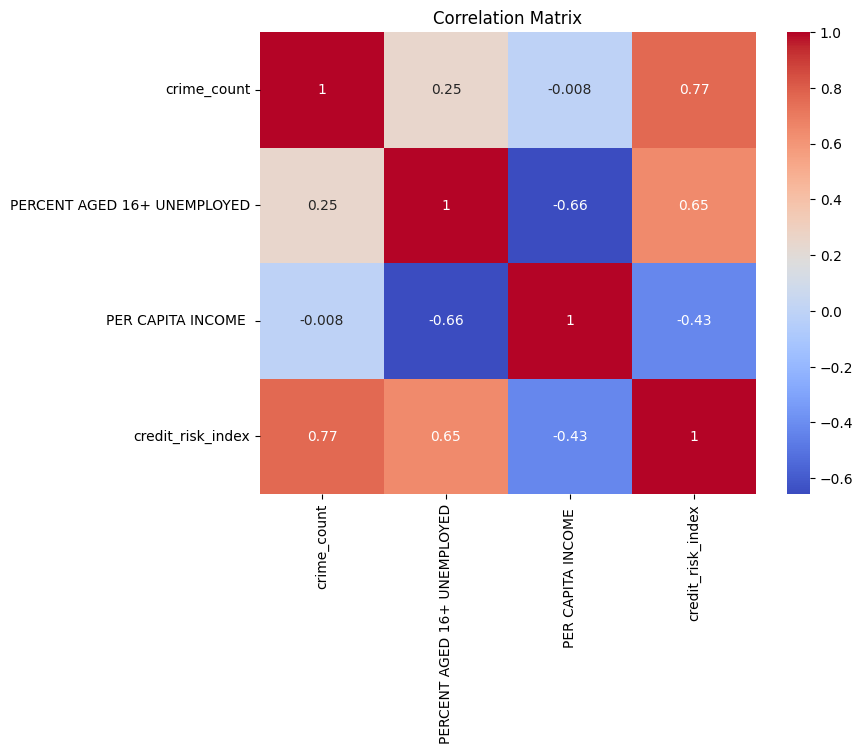

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# Statistical Test

In [ ]:
from scipy.stats import ttest_ind

high_unemployment = merged_gdf[merged_gdf['PERCENT AGED 16+ UNEMPLOYED'] > 10]['crime_count']
low_unemployment = merged_gdf[merged_gdf['PERCENT AGED 16+ UNEMPLOYED'] <= 10]['crime_count']

t_stat, p_value = ttest_ind(high_unemployment, low_unemployment)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 1.6381526213934425, P-value: 0.10557880482617071


In [ ]:
from scipy.stats import f_oneway

group_1 = merged_gdf[merged_gdf['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'] < 15]['crime_count']
group_2 = merged_gdf[(merged_gdf['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'] >= 15) &
                     (merged_gdf['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'] < 30)]['crime_count']
group_3 = merged_gdf[merged_gdf['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'] >= 30]['crime_count']

print(f"Group 1 Size: {len(group_1)}")
print(f"Group 2 Size: {len(group_2)}")
print(f"Group 3 Size: {len(group_3)}")
f_stat, p_value = f_oneway(group_1, group_2, group_3)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


Group 1 Size: 30
Group 2 Size: 31
Group 3 Size: 16
F-statistic: 0.875445394876098
P-value: 0.4209466832111479


# EDA

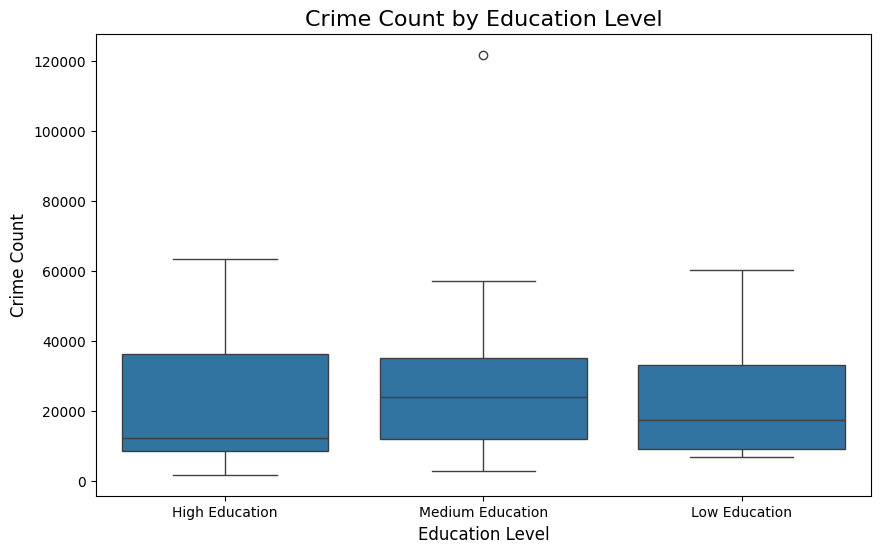

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

merged_gdf['education_group'] = pd.cut(
    merged_gdf['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'],
    bins=[0, 15, 30, 100],
    labels=['High Education', 'Medium Education', 'Low Education']
)

plt.figure(figsize=(10, 6))
sns.boxplot(x='education_group', y='crime_count', data=merged_gdf)
plt.title("Crime Count by Education Level", fontsize=16)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Crime Count", fontsize=12)
plt.show()


<ipython-input-63-870104cf33c6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = merged_gdf.groupby('education_group')['crime_count'].mean().reset_index()


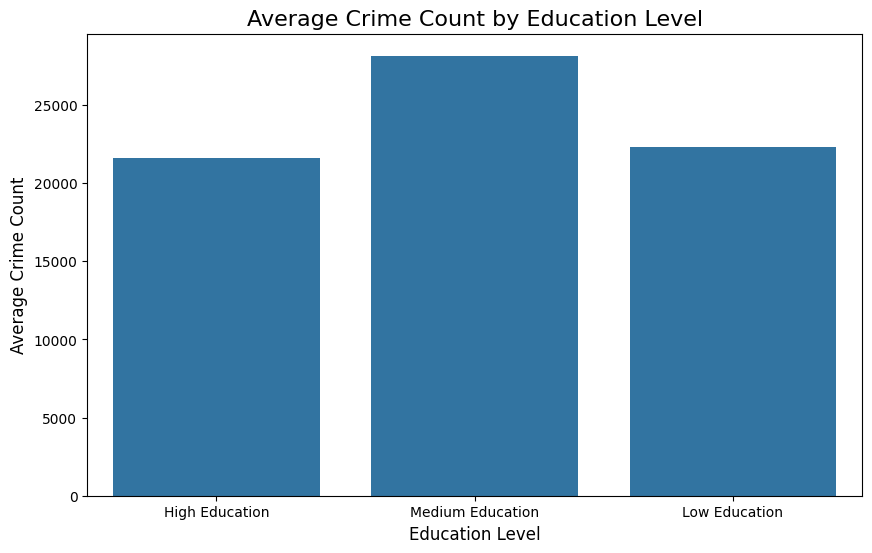

In [ ]:
grouped_data = merged_gdf.groupby('education_group')['crime_count'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='education_group', y='crime_count', data=grouped_data)
plt.title("Average Crime Count by Education Level", fontsize=16)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Average Crime Count", fontsize=12)
plt.show()


In [ ]:
correlation = merged_gdf['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'].corr(merged_gdf['crime_count'])
print(f"Correlation between education and crime count: {correlation}")


Correlation between education and crime count: 0.06090426083284518


In [ ]:
print(merged_gdf[['PERCENT AGED 16+ UNEMPLOYED', 'crime_count']].describe())


       PERCENT AGED 16+ UNEMPLOYED    crime_count
count                    77.000000      77.000000
mean                     15.372727   24375.051948
std                       7.543412   20570.387424
min                       4.700000    1859.000000
25%                       9.200000    9741.000000
50%                      13.900000   17957.000000
75%                      20.000000   35701.000000
max                      35.900000  121672.000000


In [ ]:
correlation = merged_gdf['PERCENT AGED 16+ UNEMPLOYED'].corr(merged_gdf['crime_count'])
print(f"Correlation between Unemployment Rate and Crime Count: {correlation}")


Correlation between Unemployment Rate and Crime Count: 0.24701492395383093


# Scatter Plot

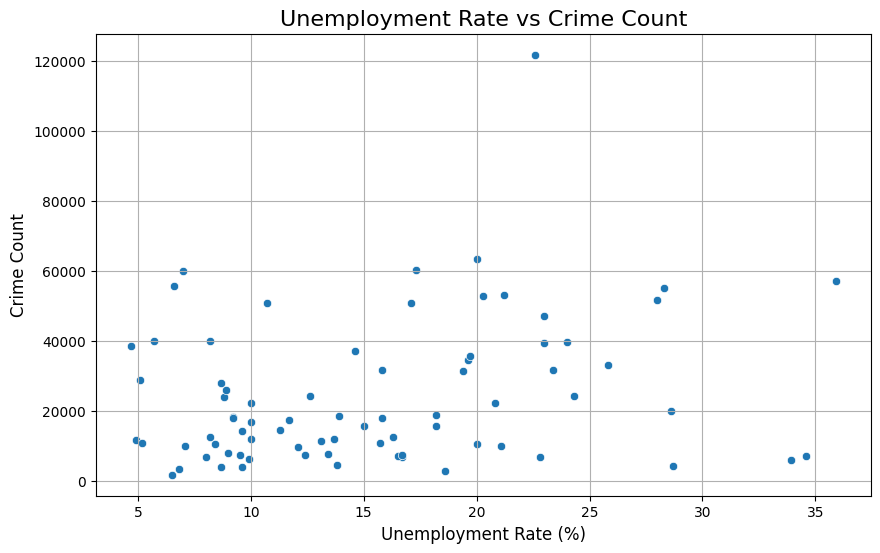

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PERCENT AGED 16+ UNEMPLOYED', y='crime_count', data=merged_gdf)
plt.title('Unemployment Rate vs Crime Count', fontsize=16)
plt.xlabel('Unemployment Rate (%)', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.grid()
plt.show()


# OLS Regression Analysis

In [ ]:
import statsmodels.api as sm

X = merged_gdf[['PERCENT AGED 16+ UNEMPLOYED', 'PER CAPITA INCOME ', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']]
y = merged_gdf['crime_count']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            crime_count   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.467
Date:                Mon, 27 Jan 2025   Prob (F-statistic):             0.0204
Time:                        20:21:30   Log-Likelihood:                -868.36
No. Observations:                  77   AIC:                             1745.
Df Residuals:                      73   BIC:                             1754.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
merged_gdf.columns

Index(['the_geom', 'PERIMETER', 'AREA', 'COMAREA_', 'COMAREA_ID', 'AREA_NUMBE',
       'COMMUNITY', 'AREA_NUM_1', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'Community Area Number', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'Community Area', 'crime_count', 'credit_risk_index',
       'education_group'],
      dtype='object')

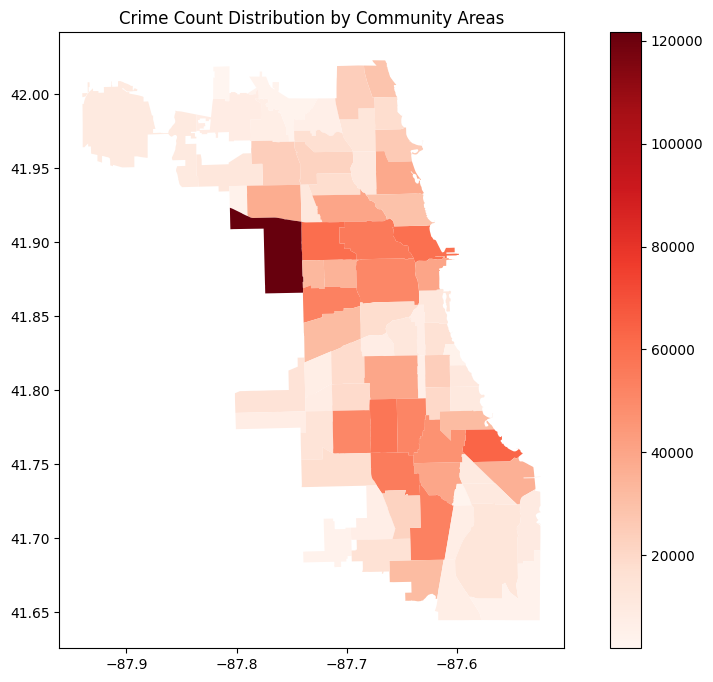

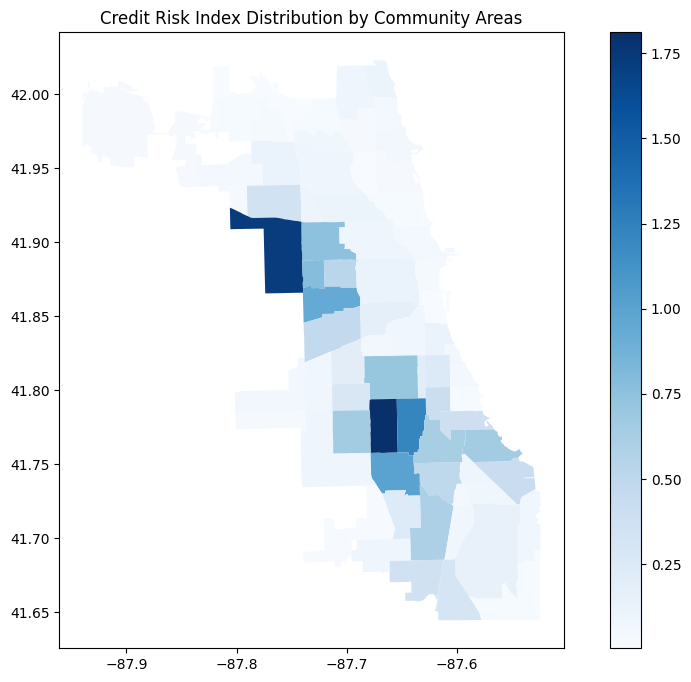

In [ ]:
import geopandas as gpd

merged_gdf.plot(column='crime_count', cmap='Reds', legend=True, figsize=(12, 8))
plt.title("Crime Count Distribution by Community Areas")
plt.show()

merged_gdf.plot(column='credit_risk_index', cmap='Blues', legend=True, figsize=(12, 8))
plt.title("Credit Risk Index Distribution by Community Areas")
plt.show()
